# Pre-trained Networks on Oyster and green oyster mushroom with Resnet50

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.keras as keras
import os
plt.rcParams['figure.figsize'] = (10,12)



### Initialize the model 



In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions,preprocess_input

In [3]:
model = ResNet50()

102967424/102967424 [==============================] - 4s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Test the model with an image


In [5]:
ls

 Datentr�ger in Laufwerk C: ist Windows-SSD
 Volumeseriennummer: 309D-D026

 Verzeichnis von c:\Users\helge\spiced_projects_working folder\week9\9_6_pretrained_models

10.03.2023  11:36    <DIR>          .
10.03.2023  10:11    <DIR>          ..
10.03.2023  10:11    <DIR>          images
10.03.2023  11:34         1.052.088 Pretrained_models - oyster and green oyster mushroom.ipynb
10.03.2023  11:34         1.052.088 Pretrained_models.ipynb
10.03.2023  10:10           155.594 VGG16.net.png
               3 Datei(en),      2.259.770 Bytes
               3 Verzeichnis(se), 30.234.583.040 Bytes frei


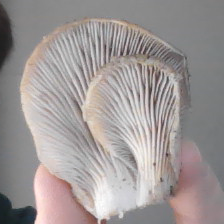

In [8]:
pic = keras.preprocessing.image.load_img('images/oyster.png',target_size=(224,224))
pic

In [9]:
pic.size

(224, 224)

In [10]:
type(pic)

PIL.PngImagePlugin.PngImageFile

In [11]:
# Convert to numpy array
pic = keras.preprocessing.image.img_to_array(pic,dtype='uint8')

In [12]:
pic.shape

(224, 224, 3)

In [13]:
# pic

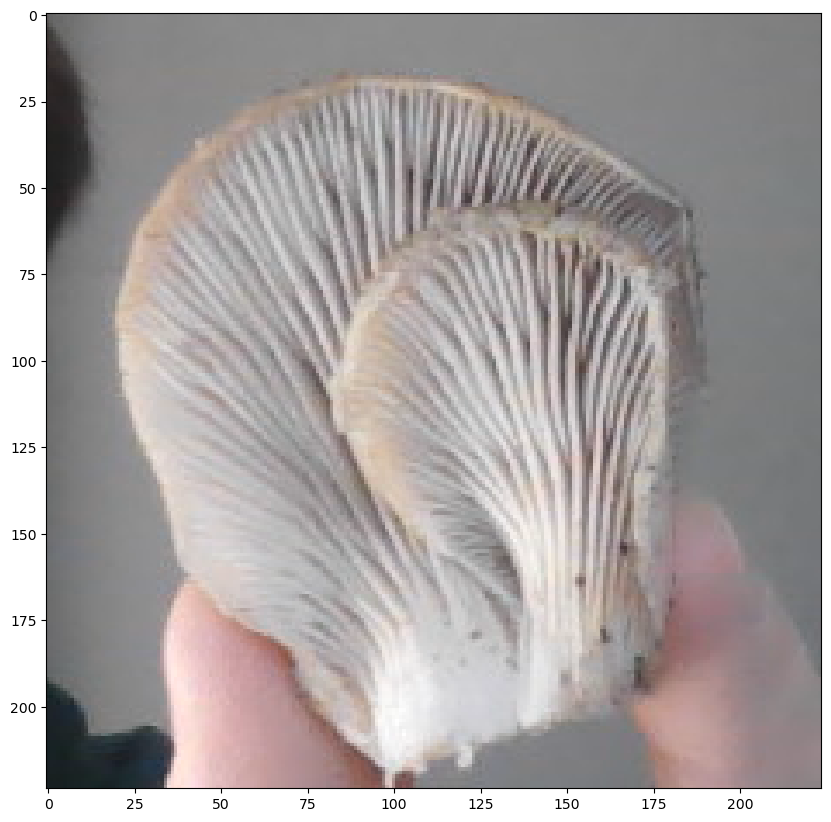

In [14]:
plt.imshow(pic)

In [15]:
# expand dimension of image to format (no. of images,height,width,no. of channels)

pic.shape

(224, 224, 3)

In [16]:
pic = np.expand_dims(pic,axis=0)
pic.shape

(1, 224, 224, 3)

### Make a prediction

In [17]:
pred = model.predict(pic)

1/1 [==============================] - 3s 3s/step


In [18]:
len(pred[0])

1000

In [19]:
# using the Resnet model built in decode prediction function 
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n04286575', 'spotlight', 0.2450556),
  ('n07734744', 'mushroom', 0.117025666),
  ('n04599235', 'wool', 0.0798902),
  ('n02804414', 'bassinet', 0.065184),
  ('n03271574', 'electric_fan', 0.05093969)]]

In [20]:
# preprocess input and predict
preprocesed_image = preprocess_input(pic)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


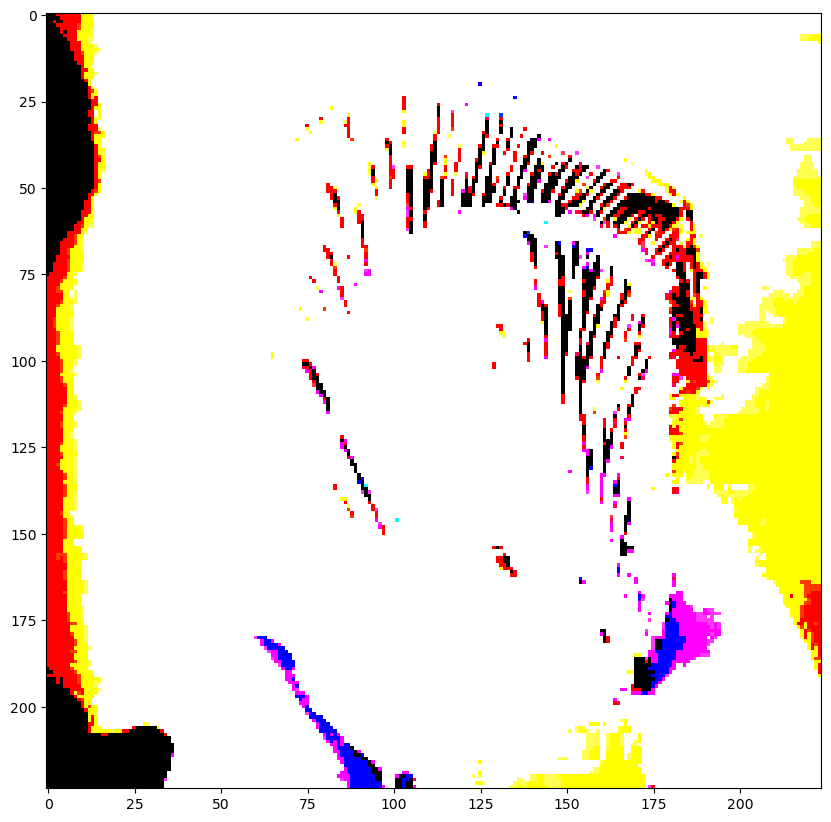

In [21]:
plt.imshow(preprocesed_image[0])

In [22]:
pred_preprocessed = model.predict(preprocesed_image)

1/1 [==============================] - 1s 1s/step


In [23]:
np.argmax(pred_preprocessed)

947

In [24]:
pred_preprocessed

array([[2.40740610e-05, 4.24148784e-05, 2.37096538e-06, 6.67517406e-06,
        1.05644549e-05, 1.32179679e-03, 4.90934726e-05, 9.66762673e-05,
        3.94794406e-05, 3.24423076e-04, 9.22097315e-05, 3.85410749e-05,
        2.38924782e-04, 5.94111276e-04, 1.27368898e-04, 6.36328468e-06,
        4.27498671e-05, 3.58990255e-05, 3.85896055e-06, 3.24621005e-03,
        7.64186043e-05, 4.93384781e-04, 4.55347363e-05, 3.38360609e-04,
        1.57933726e-04, 3.04334935e-06, 1.38760179e-05, 1.77250313e-05,
        1.83823850e-05, 2.15116925e-05, 8.30264696e-07, 8.72279315e-07,
        4.63395099e-06, 8.52446974e-05, 2.54260871e-04, 2.21396658e-05,
        3.70385824e-05, 2.57653937e-06, 4.55053887e-05, 6.86616331e-05,
        1.81083378e-05, 1.77154998e-05, 1.03189523e-05, 5.40600973e-04,
        4.24280051e-06, 3.26927147e-06, 2.71106092e-06, 6.36161858e-05,
        1.86227214e-06, 1.68035569e-06, 3.56295573e-06, 1.02180435e-04,
        3.79851881e-05, 4.60444717e-05, 1.04576444e-04, 4.877239

In [25]:
pic

array([[[[103,  99, 100],
         [101, 101, 101],
         [104, 104, 104],
         ...,
         [127, 125, 125],
         [127, 125, 125],
         [127, 125, 125]],

        [[ 96,  92,  93],
         [ 99,  99,  99],
         [103, 103, 103],
         ...,
         [127, 125, 125],
         [127, 125, 125],
         [127, 125, 125]],

        [[ 90,  86,  85],
         [ 98,  98,  96],
         [105, 105, 105],
         ...,
         [126, 126, 126],
         [125, 125, 125],
         [125, 125, 125]],

        ...,

        [[ 24,  30,  33],
         [ 23,  31,  31],
         [ 24,  32,  32],
         ...,
         [142, 132, 134],
         [143, 133, 135],
         [143, 133, 135]],

        [[ 24,  30,  35],
         [ 23,  31,  33],
         [ 23,  31,  33],
         ...,
         [139, 131, 133],
         [139, 131, 133],
         [139, 131, 133]],

        [[ 24,  30,  35],
         [ 23,  31,  33],
         [ 23,  31,  33],
         ...,
         [139, 131, 133],
        

In [26]:
preprocesed_image

array([[[[-3.9390030e+00, -1.7778999e+01, -2.0680000e+01],
         [-2.9390030e+00, -1.5778999e+01, -2.2680000e+01],
         [ 6.0997009e-02, -1.2778999e+01, -1.9680000e+01],
         ...,
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00],
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00],
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00]],

        [[-1.0939003e+01, -2.4778999e+01, -2.7680000e+01],
         [-4.9390030e+00, -1.7778999e+01, -2.4680000e+01],
         [-9.3900299e-01, -1.3778999e+01, -2.0680000e+01],
         ...,
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00],
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00],
         [ 2.1060997e+01,  8.2210007e+00,  3.3199997e+00]],

        [[-1.8939003e+01, -3.0778999e+01, -3.3680000e+01],
         [-7.9390030e+00, -1.8778999e+01, -2.5680000e+01],
         [ 1.0609970e+00, -1.1778999e+01, -1.8680000e+01],
         ...,
         [ 2.2060997e+01,  9.2210007e+00,  2.3199997e+00],
         [

In [27]:
decode_predictions(pred_preprocessed)

[[('n07734744', 'mushroom', 0.47267294),
  ('n13052670', 'hen-of-the-woods', 0.11608995),
  ('n13044778', 'earthstar', 0.039895114),
  ('n04033901', 'quill', 0.030517433),
  ('n02051845', 'pelican', 0.027836872)]]

> The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.

https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input

### Try it on many images

In [28]:
pwd

'c:\\Users\\helge\\spiced_projects_working folder\\week9\\9_6_pretrained_models'

In [33]:
import glob
base_path = "./images/folder/*"
actual_labels = ['common_porecrust','green_oyster','hairy_bracket','many-colored_polypore','oyster']

In [34]:
glob.glob(base_path)

['./images/folder\\common porecrust.png',
 './images/folder\\Green oyster.png',
 './images/folder\\hairy bracket.png',
 './images/folder\\many-colored polypore.png',
 './images/folder\\oyster.png']

In [35]:
def batch_prediction(path = base_path):

    for i,img_path in enumerate(glob.glob(base_path)):
        
        """read and preprocess"""
        pic = keras.preprocessing.image.load_img(img_path,target_size=(224,224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = preprocess_input(image_batch)
        
        """predict"""
        predictions = model.predict(processed_image)
        label = decode_predictions(
    predictions)

        """plot"""
        plt.subplot(3,2, i+1);
        plt.tight_layout()
        plt.imshow(pic)
        plt.title(f"""actual label is {actual_labels[i]} \n predicted as {label[0][0][1]}""" )

1/1 [==============================] - 0s 115ms/step


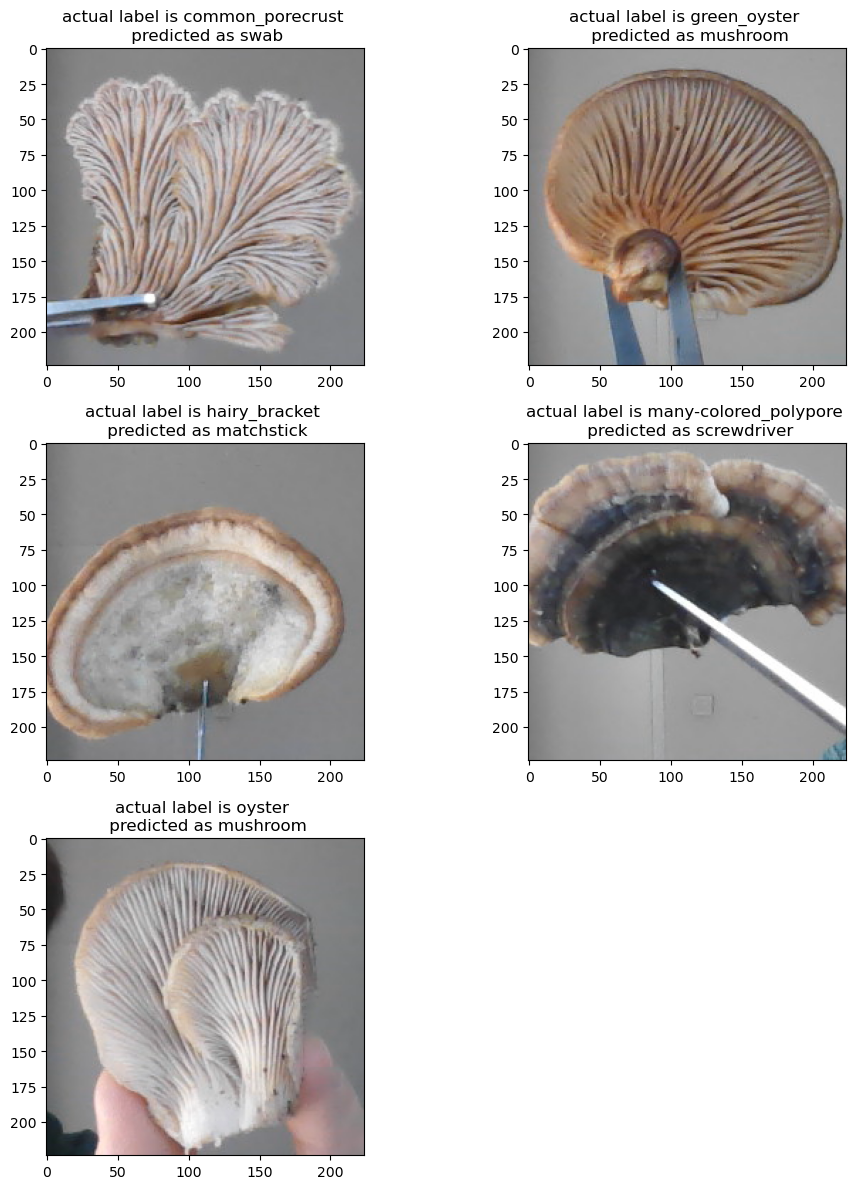

In [36]:
batch_prediction()